In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path = "online_retail_II.xlsx"

In [5]:
df = pd.read_excel(file_path, sheet_name="Year 2009-2010")

In [6]:
print("Shape of dataset:", df.shape)
display(df.head())

Shape of dataset: (525461, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [7]:
print("\nColumns and their data types:")
print(df.dtypes)


Columns and their data types:
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object


In [8]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
# 2️ Drop rows with missing Description or Customer ID
df = df.dropna(subset=['Description', 'Customer ID'])

In [11]:
#changing coustomer data type from float to int
df['Customer ID'] = df['Customer ID'].astype(int)

In [12]:
# removing any quantity less then 0 and same for price can't be less then 0 
df = df[df['Quantity'] > 0]
df = df[df['Price'] > 0]

In [13]:
#checking clean data
print("Cleaned dataset shape:", df.shape)
df.head()

Cleaned dataset shape: (400916, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


In [14]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,400916.000000,400916,400916.000000,400916.000000
mean,13.767418,2010-07-01 05:01:16.167027712,3.305826,15361.544074
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000
25%,2.000000,2010-03-26 13:28:00,1.250000,13985.000000
50%,5.000000,2010-07-09 10:26:00,1.950000,15311.000000
75%,12.000000,2010-10-14 13:58:45,3.750000,16805.000000
max,19152.000000,2010-12-09 20:01:00,10953.500000,18287.000000
std,97.638385,NaN,35.047719,1680.635823


In [54]:
print("Unique Customers:", df['Customer ID'].nunique())
print("Unique Products:", df['StockCode'].nunique())


all_customers = df[['Customer ID','Description']].drop_duplicates(subset='Customer ID', keep='first').reset_index(drop=True)
all_customers = all_customers.reset_index()
all_customers.to_csv("unique_customers.csv", index=False)

Unique Customers: 4312
Unique Products: 4017


In [16]:
# Top countries by number of transactions
top_countries =df['Country'].value_counts().head(10)
print("Top 10 countries by number of transactions:")
print(top_countries)

Top 10 countries by number of transactions:
Country
United Kingdom    364233
EIRE                8503
Germany             7645
France              5452
Netherlands         2728
Spain               1228
Switzerland         1170
Belgium             1036
Portugal             983
Sweden               867
Name: count, dtype: int64


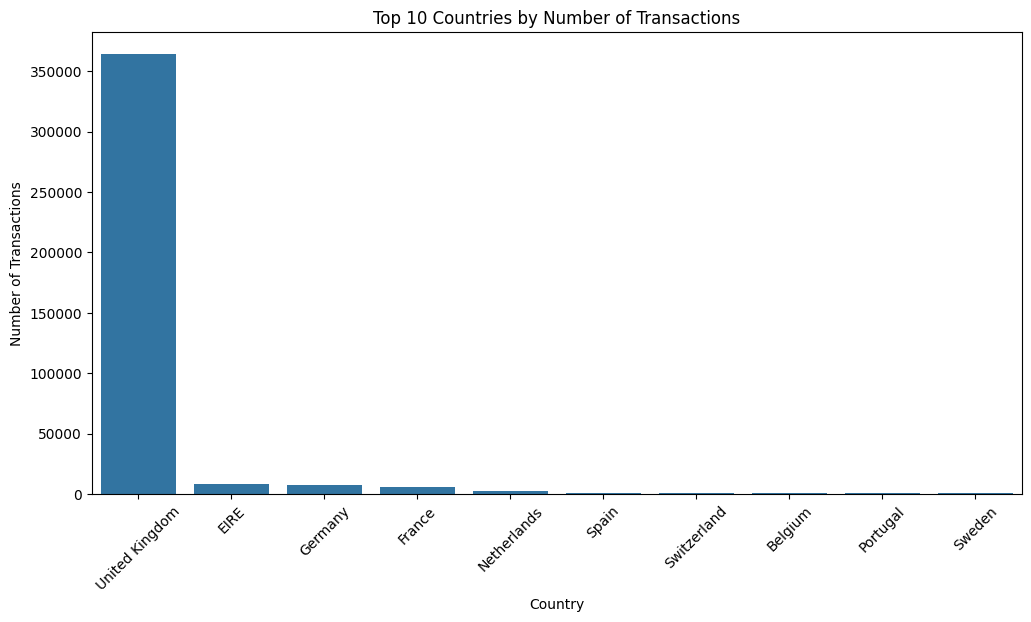

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.xticks(rotation=45)
plt.title("Top 10 Countries by Number of Transactions")
plt.ylabel("Number of Transactions")
plt.show()

In [18]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 Products by Quantity Sold:")
print(top_products)

Top 10 Products by Quantity Sold:
Description
WHITE HANGING HEART T-LIGHT HOLDER    56814
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54610
BROCADE RING PURSE                    48166
PACK OF 72 RETRO SPOT CAKE CASES      45129
ASSORTED COLOUR BIRD ORNAMENT         44431
60 TEATIME FAIRY CAKE CASES           35656
PACK OF 60 PINK PAISLEY CAKE CASES    30871
JUMBO BAG RED RETROSPOT               29519
SMALL POPCORN HOLDER                  25703
BLACK AND WHITE PAISLEY FLOWER MUG    25685
Name: Quantity, dtype: int64


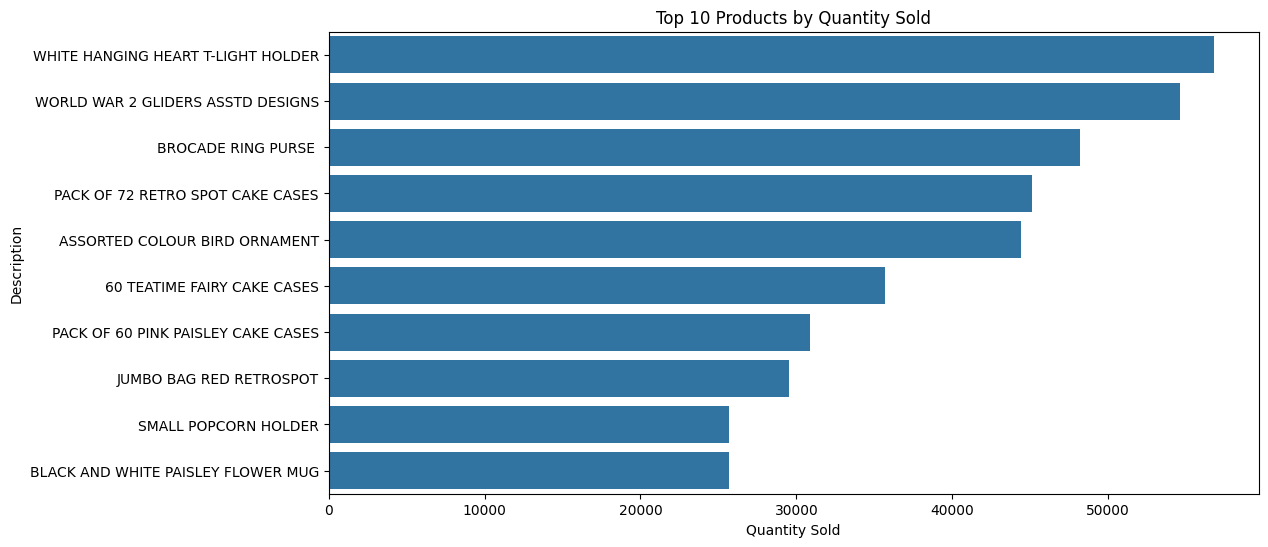

In [19]:
# Visualize it
plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Quantity Sold")
plt.show()

In [20]:
# this tell us how many unique products each cuntry bought
product_country = df.groupby(['Country', 'Description'])['Quantity'].sum().reset_index()
product_country.head()

,Country,Description,Quantity
0,Australia,12 PENCILS SMALL TUBE RED SPOTTY,24
1,Australia,20 DOLLY PEGS RETROSPOT,36
2,Australia,3 HOOK HANGER MAGIC GARDEN,24
3,Australia,3 TIER CAKE TIN GREEN AND CREAM,16
4,Australia,3 TIER CAKE TIN RED AND CREAM,16


In [21]:
# this tells us which product is mostly sold in each cuntry 
top_product_per_country = product_country.loc[product_country.groupby('Country')['Quantity'].idxmax()]
top_product_per_country.head()

,Country,Description,Quantity
12,Australia,60 CAKE CASES DOLLY GIRL DESIGN,504
648,Austria,MINI HIGHLIGHTER PENS,120
866,Bahrain,TOOTHPASTE TUBE PEN,60
1155,Belgium,PACK OF 60 MUSHROOM CAKE CASES,264
1406,Brazil,DRAGONS BLOOD INCENSE,25


In [22]:
top_countries_list = df['Country'].value_counts().head(5).index
top_countries_list

Index(['United Kingdom', 'EIRE', 'Germany', 'France', 'Netherlands'], dtype='object', name='Country')

In [23]:
top_product_per_country_filtered = top_product_per_country[top_product_per_country['Country'].isin(top_countries_list)]
top_product_per_country_filtered

,Country,Description,Quantity
2882,EIRE,60 TEATIME FAIRY CAKE CASES,3924
6358,France,SET/6 FRUIT SALAD PAPER CUPS,7152
8181,Germany,WOODLAND CHARLOTTE BAG,1590
10058,Netherlands,FOLKART ZINC HEART CHRISTMAS DEC,5425
18448,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,51578


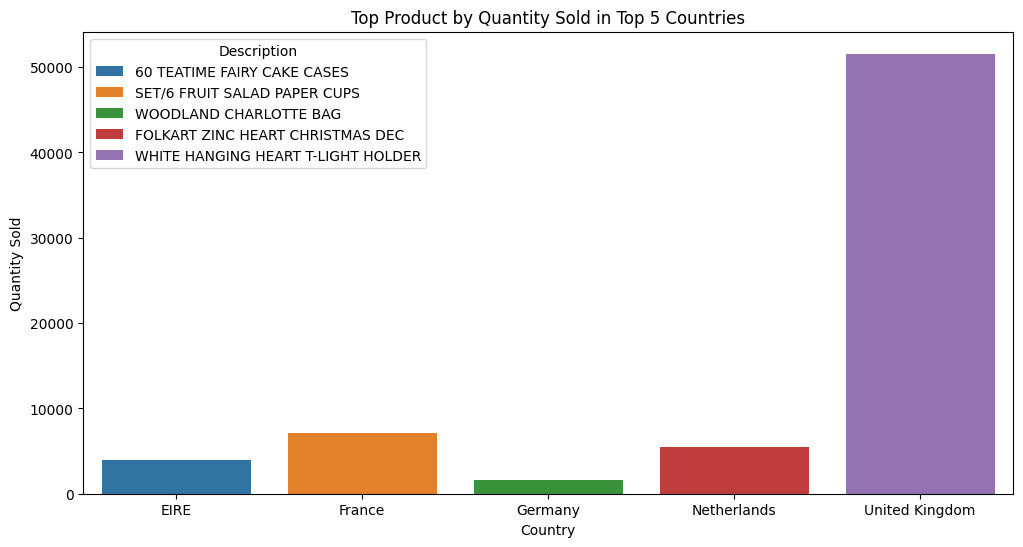

In [24]:
#telling us which product is best seller in each cuntry with how many of those sold
plt.figure(figsize=(12,6))
sns.barplot(x='Country', y='Quantity', hue='Description', data=top_product_per_country_filtered)
plt.title("Top Product by Quantity Sold in Top 5 Countries")
plt.ylabel("Quantity Sold")
plt.show()

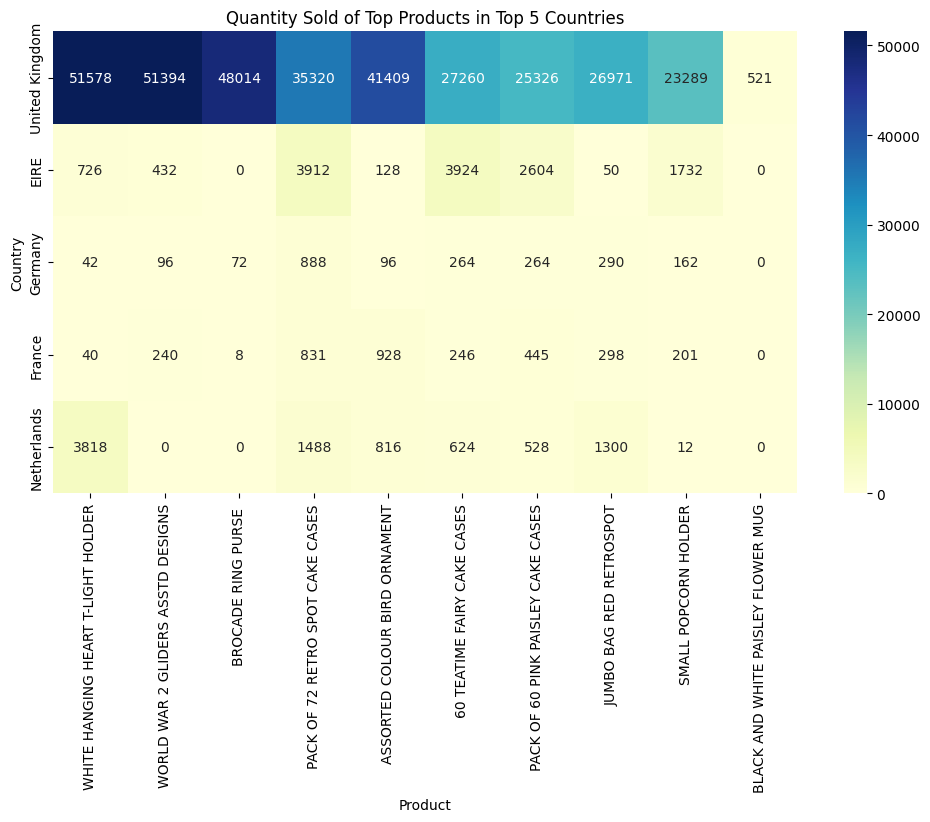

In [25]:
# Pivot table: countries as rows, products as columns, values = quantity sold
heatmap_data = df.groupby(['Country', 'Description'])['Quantity'].sum().unstack(fill_value=0)

# Optional: focus only on top 5 countries and top 10 products for readability
top_countries = df['Country'].value_counts().head(5).index
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10).index
heatmap_filtered = heatmap_data.loc[top_countries, top_products]

# Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_filtered, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Quantity Sold of Top Products in Top 5 Countries")
plt.ylabel("Country")
plt.xlabel("Product")
plt.show()


In [26]:
# Create TotalPrice = Quantity * Price
df['TotalPrice'] = df['Quantity'] * df['Price']


In [27]:
top_customers = df.groupby('Customer ID')['TotalPrice'].sum().sort_values(ascending=False).head(10)


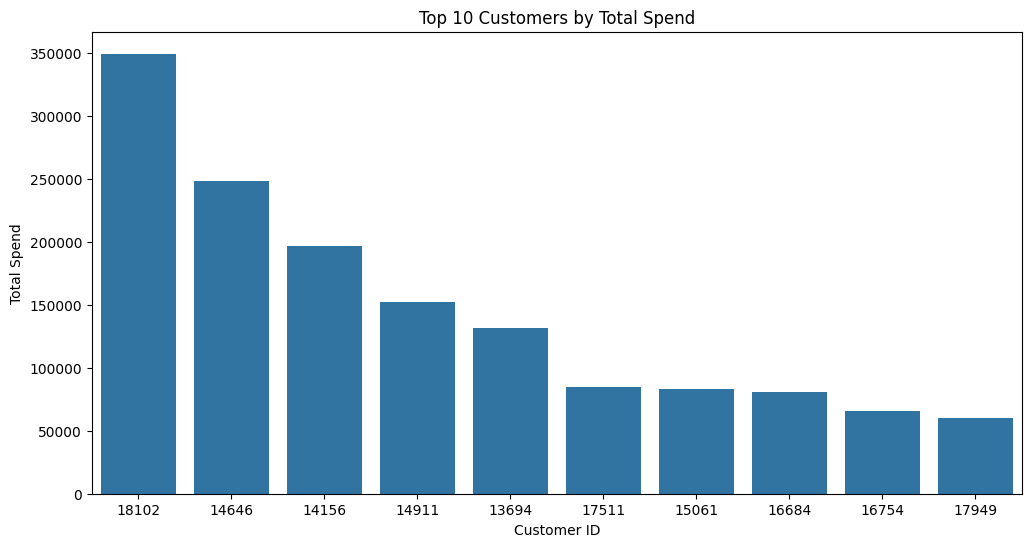

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values)
plt.title("Top 10 Customers by Total Spend")
plt.xlabel("Customer ID")
plt.ylabel("Total Spend")
plt.show()

In [29]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [30]:
df['MonthYear'] = df['InvoiceDate'].dt.to_period('M')


In [31]:
revenue_per_month = df.groupby('MonthYear')['TotalPrice'].sum()
revenue_per_month

MonthYear
2009-12     683504.010
2010-01     555802.672
2010-02     504558.956
2010-03     696978.471
2010-04     591982.002
2010-05     597833.380
2010-06     636371.130
2010-07     589736.170
2010-08     602224.600
2010-09     829013.951
2010-10    1033112.010
2010-11    1166460.022
2010-12     310656.370
Freq: M, Name: TotalPrice, dtype: float64

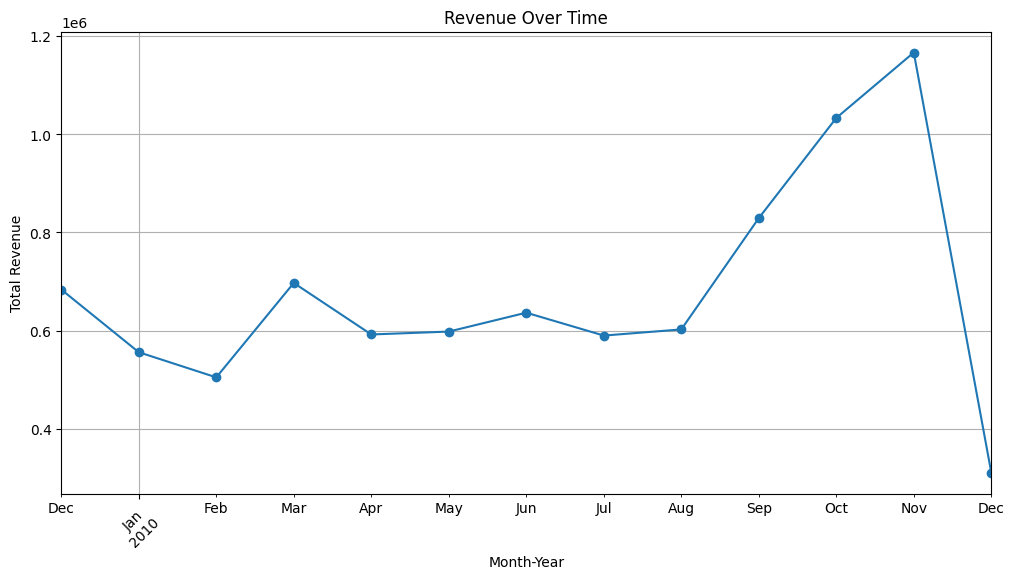

In [32]:
plt.figure(figsize=(12,6))
revenue_per_month.plot(marker='o')
plt.title("Revenue Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [33]:
revenue_per_month = revenue_per_month.reset_index()  # Make MonthYear a column instead of index
revenue_per_month.to_csv("Revenue_Per_Month.csv", index=False)

In [34]:
# Export top countries
top_countries = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).reset_index()
top_countries.to_csv("Top_Countries.csv", index=False)

In [35]:
# Export top products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10).reset_index()
top_products.to_csv("Top_Products.csv", index=False)

In [36]:
# Export top customers
top_customers = df.groupby('Customer ID')['TotalPrice'].sum().sort_values(ascending=False).head(10).reset_index()
top_customers.to_csv("Top_Customers.csv", index=False)